In [9]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import awkward
import itertools
import time, sys
import matplotlib.colors
from IPython.display import clear_output
from itertools import chain

def update_progress(i, nfiles): #progress bar, just for show
    progress = i / nfiles
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "N Files to process = {0} \nProgress: [{1}] {2:.1f}%".format(nfiles, "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

#thefile = '/global/project/projectdirs/lz/users/mwilliams/EFTrecon/Kr_Injection/PU/EFTrecon_PU_500_DEV_FFN_95_lzap_waveforms_mctruth.root'
#thefile = '/global/project/projectdirs/lz/users/mwilliams/MS500phd_forthruth_mctruth.root'
#thefile = '/global/project/projectdirs/lz/users/mwilliams/LZAPMS_TruthSS_out_mctruth.root'
#thefile = '/global/project/projectdirs/lz/users/mwilliams/MSSIStuff/alphaN_MSSIdata_mctruth.root'
thefile = '/global/project/projectdirs/lz/users/mwilliams/HNR_YBe_et.root'

In [10]:
Truth = uproot.open(thefile)['RQMCTruth']
eventID = Truth.array('mcTruthEvent.eventID')
parent = Truth.array('mcTruthEvent.parentParticle')
parentE = Truth.array('mcTruthEvent.parentEnergy_keV')
parentV = Truth.array('mcTruthEvent.parentVolume')
eposZ = Truth.array('mcTruthEvent.parentPositionZ_mm')
ePosX = Truth.array('mcTruthEvent.parentPositionX_mm')
ePosY = Truth.array('mcTruthEvent.parentPositionY_mm')
R2 = ePosX**2 + ePosY**2
edirZ = Truth.array('mcTruthEvent.parentDirectionZ')
pName = Truth.array('mcTruthVertices.particleName')
vPosZ = Truth.array('mcTruthVertices.positionZ_mm')
vPosX = Truth.array('mcTruthVertices.positionX_mm')
vPosY = Truth.array('mcTruthVertices.positionY_mm')
vR = vPosX**2 + vPosY**2

In [11]:
volumeName = Truth.array('mcTruthVertices.volumeName')

In [15]:
print(parent)

[b'Pb212' b'YBe_neutron' b'Pb214' ... b'Pb214' b'Pb214' b'Pb214']


In [3]:
v = [np.diff(i) for i in vPosZ] 
vertexZ = []
for i in v:
    if i.size >= 3:
        vertexZ.append(np.diff(np.diff(i)))
    if i.size == 2:
        vertexZ.append(np.diff(i))
    if i.size == 1:
        vertexZ.append(i)
        
vertexZ = list(itertools.chain.from_iterable(vertexZ))
#print(vertexZ)

In [4]:
r = [np.diff(i) for i in vR] 
vertexR = []
for i in r:
    if i.size >= 3:
        vertexR.append(np.diff(np.diff(i)))
    if i.size == 2:
        vertexR.append(np.diff(i))
    if i.size == 1:
        vertexR.append(i)
        
vertexR = list(itertools.chain.from_iterable(vertexR))
print(vertexR)

[537362.1099780736, -2124860.673766529, 186407.9085791479, 2181327.406147265, 119.38840474013705, 493.72825124976225, 381658.573944057, 105.49474635446677, -43438.23054952815, 126711.75357218622, 180.78710464879987, 1371.3216508791884, -24085.89628932152, 1.4739222802745644, 16806.629176533796, -1192.3417790365638, -14441.200948289828, -555272.4577298183, 482915.8336416985, -331499.1457495184, 378736.5900839218, -154669.43073244533, 83382.73521710729, -265742.12405516295, 145061.34057891002, 1336339.0594970544, 2198808.1814545817, -509972.0429693009, -413799.6753062835, 1194000.8774097222, -482870.4096467452, -171480.34221037198, 115285.54748955858, 16335.504897610052, -288518.87180768145, 27351.50385155191, -0.21650549603509717, 1605425.0465442843, -23005.876375964377, -73696.42429443682, 190734.62719088164, -472766.5098545619, 239478.3845680023, 69261.96150975884, -202269.78696495434, 152537.46156644681, 218898.75764449802, -557439.409314574, 384121.7285427749, -153130.53152801958, -

In [ ]:
print(eposZ)

In [ ]:
print(R2)

/global/homes/m/mrw7816/miniconda3/envs/fast_lz/lib/python3.6/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


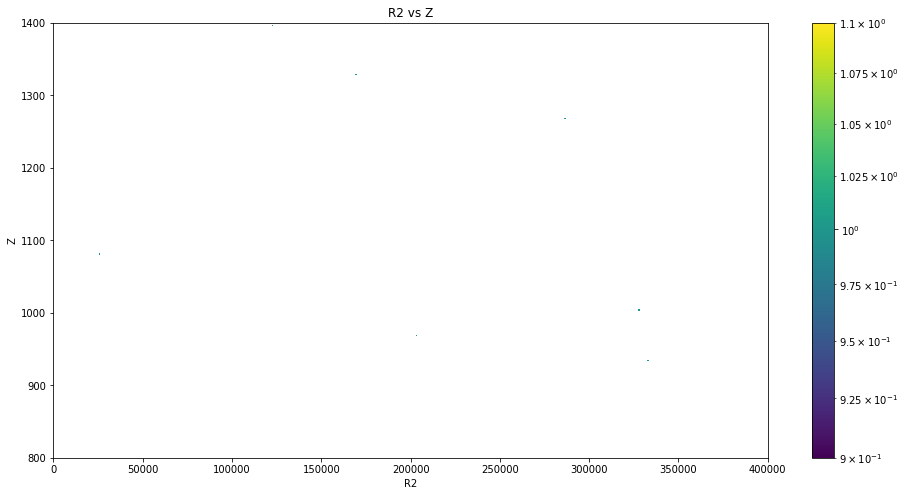

In [5]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
plt.hist2d(R2,eposZ, bins=(1000, 1000),range =  [[0,400000], [800,1400]], cmin=1,norm=matplotlib.colors.LogNorm())#norm=matplotlib.colors.LogNorm()
plt.colorbar()
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_title('R2 vs Z')
ax.set_xlabel('R2')
ax.set_ylabel('Z')
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 8))
plt.title('blag')
Q = plt.quiver(R2, eposZ, 0, vertexZ,scale_units = 'width' ,scale = 0.1*np.log10(eposZ),pivot='mid',width = 0.5,headaxislength = 5,minlength = 0.001)
plt.scatter(R2, eposZ, color='r', s=5)

In [6]:
for i,z in enumerate(vertexZ):
    #print(z)
    if z < 0:
        #print(z)
        vertexZ[i] = -1
    else:
        #print(z)
        vertexZ[i] = 1
print(vertexZ)

[-1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1]


In [ ]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
plt.hist(vertexZ, bins = 2,ec='k')
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_title('Vertex Z Direction')
ax.set_xlabel('Down or Up')
ax.set_ylabel('Counts')
plt.show()

In [3]:
phestart = Truth.array('mcTruthPulses.firstPheTime_ns')/1000
pheend = Truth.array('mcTruthPulses.lastPheTime_ns')/1000
phemean = (phestart + pheend)/2
vernum = Truth.array('mcTruthPulses.vertexNumber')
indentity = Truth.array('mcTruthPulses.pulseIdentifier')
table = []
detpho1 = Truth.array('mcTruthVertices.detectedS1Photons')
detpho2 = Truth.array('mcTruthVertices.detectedS2Photons')
s1 = Truth.array('mcTruthVertices.s1PulseIndex')
s2 = Truth.array('mcTruthVertices.s2PulseIndex')
t = Truth.array('mcTruthVertices.time_ns')
print(vernum[1])
print(phestart[1])
print(s2[1])
print(vPosZ[1])
print(detpho1[1])
print(detpho2[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 1000.003  1000.084  1001.462  1040.365  1000.632  1002.149  1003.672
  1007.616  1115.296  1008.739  1055.258  1021.663  1023.386  1029.02
  1031.571  1072.02   1006.91   1015.903  1013.854  1008.982  1016.305
  1018.045  1001.658  1050.37   1051.696  1034.619  1036.626  1060.523
  1053.698  1010.281  1014.638  1113.278  1114.62   1047.344  1049.46
  112

In [4]:
times1 = []
times2 = []
for i in s1[1]:
    times1.append(phestart[1][i])
for i in s2[1]:
    times2.append(phestart[1][i])

In [9]:
print(times2)
start1 = np.mean(times1)
start2 = np.mean(times2)
truthx = np.mean(vPosX[1])
truthy = np.mean(vPosY[1])
truthz = np.mean(vPosZ[1])
truthr = np.sqrt(truthx**2 + truthy**2 + truthz**2)/10
truthdet1 = np.sum(detpho1[1])
truthdet2 = np.sum(detpho2[1])
truthtime = abs(start2 - start1)
print(truthr)
print(truthz)
print(start1)
print(start2)
print(abs(start2 - start1))


[1001.462]
147.28516413890148
1460.8057166763194
1000.003
1001.462
1.4589999999999463


In [10]:
truthE = 0.0137*(truthdet1/0.150 + truthdet2/116)
print(truthE)

72.8198698275862


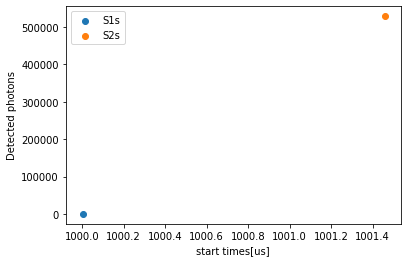

In [11]:
plt.scatter(times1,detpho1[1])
plt.scatter(times2,detpho2[1])
plt.xlabel("start times[us]")
plt.ylabel("Detected photons")
plt.legend(["S1s", "S2s"])
plt.show()

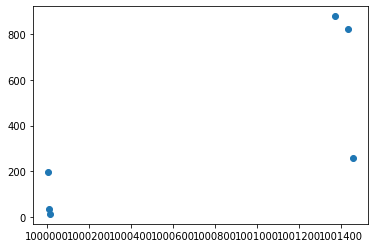

In [30]:
plt.scatter(times1,detpho1[1])
plt.show()

In [5]:
#file = '/global/project/projectdirs/lz/users/mwilliams/LZAPMS_TruthSS_out.root'
file = '/global/project/projectdirs/lz/users/mwilliams/LZAPSS_TruthSS_100.root'

In [6]:
events = uproot.open(file)['Events']
scatters = uproot.open(file)['Scatters']
eventID = events.array('eventHeader.eventID')
zc = scatters.array('ss.correctedZ_cm')
xc = scatters.array('ss.x_cm')
yc = scatters.array('ss.y_cm')
r = np.sqrt(xc**2 + yc**2 + zc**2)
sscatterS1 = scatters.array('ss.s1PulseID')
sscatterS2 = scatters.array('ss.s2PulseID')
s1c = scatters.array('ss.s1Area_phd')
s2c = scatters.array('ss.s2Area_phd')
startTime_us = events.array('pulsesTPC.pulseStartTime_ns')/1000
endTime_us = events.array('pulsesTPC.pulseEndTime_ns')/1000
lzaptime = abs(startTime_us[1][sscatterS2[1]] - startTime_us[1][sscatterS1[1]])

In [7]:
print(sscatterS1[1])
print(lzaptime)
print(s1c[1])
print(s2c[1])
print(r[1])
lzapE = 0.0137*(s1c[1]/0.150 + s2c[1]/116)
print(lzapE)

7
671.591
3.291615
476616.16
29.892756
56.5906457279622


In [8]:
deltar = abs(r[1] - truthr)
deltaE = abs(lzapE - truthE)
deltat = abs(lzaptime - truthtime)
deltaM = np.sqrt((deltaE**2) + (deltat**2) + (deltar**2))

NameError: name 'truthr' is not defined

In [9]:
print("delta r = ",deltar)
print("delta E = ",deltaE)
print("delta t = ",deltat)
print("delta M = ",deltaM)

NameError: name 'deltar' is not defined

In [10]:
zc = scatters.array('ss.correctedZ_cm')
xc = scatters.array('ss.x_cm')
yc = scatters.array('ss.y_cm')
r = np.sqrt(xc**2 + yc**2 + zc**2)
s1id = scatters.array('ss.s1PulseID')
s2id = scatters.array('ss.s2PulseID')
s1c = scatters.array('ss.s1Area_phd')/0.150
s2c = scatters.array('ss.s2Area_phd')/116
startTime_us = events.array('pulsesTPC.pulseStartTime_ns')/1000

blah = [np.mean(x) for x in xc]
#lzaps2start = [y[s2id[x][0]] for x,y in enumerate(startTime_us)]
#print(lzaps2start)

In [11]:
goods1 = []
blah = []
for i,m in enumerate(s1):
    goodid = m >= 0
    m = m[goodid]
    for j,k in enumerate(m):
        if detpho1[i][j] > 0:
            blah.append(j)
    goods1.append(m)

goods2 = []
blah1 = []
for i,m in enumerate(s2):
    goodid = m >= 0
    m = m[goodid]
    for j,k in enumerate(m):
        if detpho2[i][j] > 0:
            blah1.append(j)
    goods2.append(m)
print(goods1[27])  
print(goods2[27])

[1]
[3]


In [12]:
s2mean = [y[goods2[x]] for x,y in enumerate(phemean)]
s2start = [y[goods2[x]] for x,y in enumerate(phestart)]
s2end = [y[goods2[x]] for x,y in enumerate(pheend)]
bleh = []
for k in s2mean:
    k = k.sort()
    bleh.append([1])
    
for k in s2start:
    k = k.sort() 

for k in s2end:
    k = k.sort()
    
for l,m,n in zip(s2mean,s2end,bleh):
    for i,j in zip(l, m[1:]):
        if abs(j-i) > 6:
            n.append(1)

In [20]:
times1 = [y[goods1[x]] for x,y in enumerate(phestart)]
s2mean = [y[goods2[x]] for x,y in enumerate(phemean)]
s2start = [y[goods2[x]] for x,y in enumerate(phestart)]
differencess1 = []
differencess2 = []
s2s = []
s1s = []
for k in s2start:
    k = k.sort()
    s2s.append([1])
    
for k in s2start:       
    differencess2.append([abs(j-i) for i,j in zip(k, k[1:])])

for l,m in zip(s2start,s2s):
    for i,j in zip(l, l[1:]):
        if abs(j-i) > 1.8:
            m.append(1)

#for l,m,n in zip(s2mean,s2end,s2s):
#    for i,j in zip(l, m[1:]):
#        if abs(j-i) > 2:
#            n.append(1)

for k in times1:
    k = k.sort()
    s1s.append([1])
    
for k in times1:       
    differencess1.append([abs(j-i) for i,j in zip(k, k[1:])])

for l,m in zip(times1,s1s):
    for i,j in zip(l, l[1:]):
        if abs(j-i) > 1.8:
            m.append(1)
            
print(differencess2)
#print(s2s)
countss2 = []
for i in  s2s:
    countss2.append(len(i))    
print(countss2)
countss1 = []
for i in  s1s:
    countss1.append(len(i))    
print(countss1)
lzs2 = []
for i in s2id:
    lzs2.append(i)
print(lzs2)

[[1.1410000000000764], [], [1.178000000000111], [], [0.8170000000000073], [], [], [], [], [0.24299999999993815], [], [], [], [], [0.9760000000001128], [0.1650000000000773, 1.4529999999999745, 1.038000000000011], [], [0.6449999999999818], [], [0.7789999999999964], [0.4900000000000091, 0.084999999999809, 0.10599999999999454, 0.05900000000019645, 0.03999999999996362, 0.05899999999996908, 0.3830000000000382], [1.3669999999999618, 1.1929999999999836], [], [], [], [], [], [], [], [], [], [], [1.1019999999998618, 1.3110000000001492], [0.5080000000000382], [], [], [], [0.12200000000007094, 0.46499999999991815], [0.4130000000000109, 0.11099999999999], [0.22000000000002728, 0.28099999999994907, 1.6769999999999072], [0.41600000000005366, 0.4940000000000282], [0.18599999999992178], [0.2559999999998581], [0.7849999999999682], [0.25300000000004275]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 

In [29]:
parentpos = []
for i,j,k in zip(ePosX,ePosY,eposZ):
    parentpos.append([i,j,k])
print(parentpos)

[[1.6679519211227216, 493.0367502300675, 1704.0522504090895], [118.53530929037345, -64.89207002637626, 1716.9333606035877], [-173.9388907339071, -500.91900171993933, 683.7386423517441], [509.80724589502483, 162.8756656272759, 1268.5635734253642], [-0.2208989560660939, 322.821026863187, 1712.9981181634098], [-59.34932344458639, 115.00604636033245, 573.9408694119287], [-388.2110981396602, 695.1407242641749, 1527.5779789829817], [-202.28189314147835, 350.9554534532869, 1702.4260315947217], [-231.8090428179484, -196.0046992230824, 405.0963429222183], [542.2878249406868, -316.0074395401472, 1717.8460605157145], [418.91817097262197, 166.82333442996128, 969.0337987597104], [-653.0472051101091, 353.692438016423, 1452.5704461376565], [115.32494231748854, -112.38163412074721, 1081.3051965691907], [691.3597919990091, -266.81485573461947, 1452.6002553211724], [-342.14169767478904, -626.038964363043, 134.2530921134586], [-736.096688374047, 109.54339351564795, 1468.9527894013938], [304.2497114135171

In [31]:
for i,j in enumerate(parentpos):  
    if parentpos[i] == parentpos[i-1]:
        print("same Pos")

In [14]:
print(differencess2[24])
print(detpho2[24])
print(countss2.count(24))
print(s1[24])
print(s2[24])
print(s2id[24])
print(eposZ[24])

[]
[19898]
0
[0]
[2]
16
761.7113127353965


In [16]:
print(len(countss2))
print(len(eposZ))

45
45


In [21]:
oneS1s = []
for i,j in enumerate(differencess2):
    if not j:
        oneS1s.append([i,differencess2[i],detpho2[i],countss2.count(i),s1[i],s2[i],lzs2[i]])
        #29,201,259

IndexError: list index out of range

In [22]:
oneS1s

[]

In [23]:
ttype = []
for i,j in zip(countss1,countss2):
    if i == 1 and j == 1:
        ttype.append("SS")
    if i == 1 and j >= 2:
        ttype.append("MS")    

In [24]:
print("nSS = ", ttype.count("SS"))
print(ttype.index("SS"))
print("nMS = ", ttype.count("MS"))
print(ttype.index("MS"))

nSS =  45
0
nMS =  0


ValueError: 'MS' is not in list

In [ ]:
###### def metric(truthfile,lzapfile,scatter):
    
    Truth = uproot.open(truthfile)['RQMCTruth']
    phestart = Truth.array('mcTruthPulses.firstPheTime_ns')/1000
    detpho1 = Truth.array('mcTruthVertices.detectedS1Photons')
    detpho2 = Truth.array('mcTruthVertices.detectedS2Photons')
    s1 = Truth.array('mcTruthVertices.s1PulseIndex')
    s2 = Truth.array('mcTruthVertices.s2PulseIndex')
    vPosZ = Truth.array('mcTruthVertices.positionZ_mm')
    vPosX = Truth.array('mcTruthVertices.positionX_mm')
    vPosY = Truth.array('mcTruthVertices.positionY_mm')
    events = uproot.open(lzapfile)['Events']
    scatters = uproot.open(lzapfile)['Scatters']
    if scatter == "ss":
        zc = scatters.array('ss.correctedZ_cm')
        xc = scatters.array('ss.x_cm')
        yc = scatters.array('ss.y_cm')
        r = np.sqrt(xc**2 + yc**2 + zc**2)
        s1id = scatters.array('ss.s1PulseID')
        s2id = scatters.array('ss.s2PulseID')
        s1c = scatters.array('ss.s1Area_phd')/0.150
        s2c = scatters.array('ss.s2Area_phd')/116
        startTime_us = events.array('pulsesTPC.pulseStartTime_ns')/1000
        lzaps1start = [y[s1id[x]] for x,y in enumerate(startTime_us)]
        lzaps2start = [y[s2id[x]] for x,y in enumerate(startTime_us)]
        
    if scatter == "ms":
        msz = scatters.array('ms.correctedZ_cm')
        msx = scatters.array('ms.x_cm')
        msy = scatters.array('ms.y_cm')
        xc = [np.mean(x)**2 for x in msx]
        yc = [np.mean(x)**2 for x in msy]
        zc = [np.mean(x)**2 for x in msz]
        r = [xc[i] + yc[i] + zc[i] for i in range(len(xc))] 
        r = np.sqrt(r)
        s1id = scatters.array('ms.s1PulseID')
        s2id = scatters.array('ms.s2PulseIDs')
        s1c = scatters.array('ms.s1Area_phd')/0.150
        s2a = scatters.array('ms.s2Area_phd')/116
        s2c = [np.sum(x) for x in s2a]
        startTime_us = events.array('pulsesTPC.pulseStartTime_ns')/1000  
        lzaps1start = [y[s1id[x]] for x,y in enumerate(startTime_us)]
        lzaps2start1 = [y[s2id[x][0]] for x,y in enumerate(startTime_us)]
        lzaps2start2 = [y[s2id[x][1]] for x,y in enumerate(startTime_us)]
        lzaps2start = [(g + h) / 2 for g, h in zip(lzaps2start1, lzaps2start2)]
    

    lzaptime = []
    zip_object = zip(lzaps2start, lzaps1start)
    for lzaps2start_i, lzaps1start_i in zip_object:
        lzaptime.append(abs(lzaps2start_i-lzaps1start_i))
    lzapE = [0.0137*(s1c[i] + s2c[i]) for i in range(len(s1c))]    
    

    times1 = [y[s1[x]] for x,y in enumerate(phestart)]
    times2 = [y[s2[x]] for x,y in enumerate(phestart)]
    
    start1 = []
    start2 = []
    for i in times1:
        start1.append(np.mean(i))
    for i in times2:
        start2.append(np.mean(i))
    truthtime = []
    zip_object = zip(start2, start1)
    for start2_i, start1_i in zip_object:
        truthtime.append(abs(start2_i-start1_i))
        
    truthx2 = [np.mean(x)**2 for x in vPosX]
    truthy2 = [np.mean(x)**2 for x in vPosY]
    truthz2 = [np.mean(x)**2 for x in vPosZ]
    r2 = [truthx2[i] + truthy2[i] + truthz2[i] for i in range(len(truthx2))] 
    truthr = np.sqrt(r2)/10
    truthdet1 = [np.sum(x)/0.150 for x in detpho1]
    truthdet2 = [np.sum(x)/116 for x in detpho2]
    truthE = [0.0137*(truthdet1[i] + truthdet2[i]) for i in range(len(truthdet1))]       

    deltar = [abs(r[i] - truthr[i]) for i in range(len(truthr))]
    deltaE = [abs(lzapE[i] - truthE[i]) for i in range(len(truthE))]
    deltat = [abs(lzaptime[i] - truthtime[i]) for i in range(len(truthE))]
    deltaM = np.sqrt([deltaE[i]**2+ deltat[i]**2+ deltar[i]**2 for i in range(len(truthr))])
    print("delta r = ",deltar)
    print("delta E = ",deltaE)
    print("delta t = ",deltat)
    print("delta M = ",deltaM)

In [217]:
metric('/global/project/projectdirs/lz/users/mwilliams/LZAPMS_TruthSS_mctruth.root','/global/project/projectdirs/lz/users/mwilliams/LZAPMS_TruthSS.root','ms')

delta r =  [0.13378630597028973, 0.8724373967478414, 1.061556140931259, 0.730797655603908, 0.5758888444993602, 3.630289084518651, 1.287000660622624, 5.596189777679243, 0.6158200569871326, 0.892202607383183, 0.5940054425529411, 7.29388703038947, 0.34902784856652147, 23.311722808028875, 0.04358324092325461, 2.2330777385253384, 0.6487469829513302, 0.8159077521860922, 3.1851504310361065, 2.74806280582834, 0.46277675821954745, 3.9058906805465767, 1.0684644001286472, 1.0630941879746842, 1.2919960697489614, 343.4937447388635, 602.347955315145, 391.6328694508047, 0.6631084750994773, 1.6179170151608417, 1.0487511539989214, 0.3894300002774571, 4.0720294435848245, 0.2136950440682135, 1.7070257090592946, 1.7301416662875084, 2.037253358995372, 31.01514501821677, 3.6355304772458226, 0.39427083461217194, 10.798190894043643, 0.9196463984067407, 0.692783405015831, 0.2691925123563692, 3.7728183471299985, 0.5089800934013908, 0.35884966157885856, 2.5616205996868473, 0.41404143767425694, 0.4595758393484672

In [3]:
import glob
files = glob.glob("/global/homes/m/mrw7816/AlpacaAnalysis/run/MDC3_MCTruthEfficiency/blah*")
files

['/global/homes/m/mrw7816/AlpacaAnalysis/run/MDC3_MCTruthEfficiency/blah3.txt',
 '/global/homes/m/mrw7816/AlpacaAnalysis/run/MDC3_MCTruthEfficiency/blah.txt',
 '/global/homes/m/mrw7816/AlpacaAnalysis/run/MDC3_MCTruthEfficiency/blah4.txt',
 '/global/homes/m/mrw7816/AlpacaAnalysis/run/MDC3_MCTruthEfficiency/blah2.txt']

In [7]:
s1times = []
s2times = []
s1ids_c = []
s2ids_c = []
for i in range(4):
    with open(files[i],"r") as file:
        for line in file:
            values = []
            currentline = line.split(",")
            for val in currentline:
                values.extend(val)
                
            if i == 0:
                s1ids_c.append(values)     
            if i ==1:
                s1times.append(values)
            if i ==2:
                s2ids_c.append(values)
            if i ==3:
                s2times.append(values)

In [8]:
s1ids_c = [1000.01,1000.01,1000.01,1000.01,1000.01,1000.01,1000.01,1001.33,1000,1000,1000,1001.42,1000,1000.01,1000.02,1001.35]

[['0', '\n'],
 ['0', '1', '2', '3', '\n'],
 ['0', '1', '\n'],
 ['0', '1', '2', '3', '4', '\n'],
 ['0', '1', '2', '\n'],
 ['0', '1', '2', '3', '4', '\n'],
 ['0', '1', '2', '\n'],
 ['0', '1', '2', '3', '4', '5', '\n'],
 ['0', '1', '2', '\n'],
 ['0', '1', '2', '3', '4', '5', '6', '7', '\n'],
 ['0', '1', '2', '3', '\n'],
 ['0', '1', '2', '3', '\n'],
 ['0', '1', '\n'],
 ['0', '1', '2', '3', '4', '\n'],
 ['0', '1', '2', '3', '4', '\n'],
 ['0', '1', '2', '\n'],
 ['0', '1', '2', '3', '4', '5', '6', '7', '\n'],
 ['0', '1', '2', '3', '\n'],
 ['0', '1', '2', '\n'],
 ['0', '1', '2', '\n'],
 ['0', '1', '2', '3', '4', '\n'],
 ['0', '1', '2', '\n'],
 ['0', '\n'],
 ['0', '1', '2', '3', '\n'],
 ['0', '1', '2', '3', '4', '5', '6', '\n'],
 ['0', '1', '2', '\n'],
 ['0', '1', '2', '3', '4', '\n'],
 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '1', '0', '\n'],
 ['0', '1', '2', '3', '\n'],
 ['0', '1', '2', '\n']]

In [9]:
s2ids_c

[['1', '\n'],
 ['4', '5', '6', '\n'],
 ['2', '3', '\n'],
 ['5', '\n'],
 ['3', '\n'],
 ['5', '6', '\n'],
 ['3', '\n'],
 ['6', '7', '8', '\n'],
 ['3', '\n'],
 ['8', '9', '\n'],
 ['4', '5', '\n'],
 ['4', '5', '\n'],
 ['2', '3', '\n'],
 ['5', '6', '\n'],
 ['5', '\n'],
 ['3', '4', '\n'],
 ['8', '9', '1', '0', '\n'],
 ['4', '5', '\n'],
 ['3', '4', '5', '6', '\n'],
 ['3', '4', '\n'],
 ['5', '6', '\n'],
 ['3', '4', '\n'],
 ['1', '\n'],
 ['4', '5', '\n'],
 ['7', '8', '9', '1', '0', '1', '1', '1', '2', '1', '3', '\n'],
 ['3', '\n'],
 ['5', '6', '\n'],
 ['1', '1', '\n'],
 ['4', '5', '\n'],
 ['3', '4', '\n']]

In [12]:
import copy
s1times = [1000.01,1000.01,1000.01,1000.01,1000.01,1000.01,1000.01,1001.33]
s2times = [1467.25,1469.29]
alltimes = copy.deepcopy(s1times)
alltimes.extend(s2times)
alltimes = np.sort(alltimes)
s1ids = []
s2ids = []
index = 0
repeat = False
for time in alltimes:
    if time in s1times:
        s1ids.append(index)
    else:
        s2ids.append(index)
    index += 1
print(s1ids)
print(s2ids)

[0, 1, 2, 3, 4, 5, 6, 7]
[8, 9]


In [2]:
blah = '/global/cfs/cdirs/lz/users/grischbi/MSSI/rfr_ffr_sims/FFR_output_20200410.root'
events = uproot.open(blah)['Events']
scatters = uproot.open(blah)['Scatters']
eventID = events.array('eventHeader.eventID')
ba = scatters.array('ss.s1BottomArea_phd')

In [3]:
ba

array([309.02548 , 105.468094, 177.82343 , ..., 112.93248 , 225.94296 ,
       353.29507 ], dtype=float32)